In [1]:
import os, json
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from config import StockformerConfig
from train import train
from inference import init_config, init_model, predict

/home/rajath/miniconda3/envs/stockformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
prediction_length = 360
down_sample = min(prediction_length, 30)
load_checkpoint = f'sp500-{prediction_length}d-final'
config = init_config(load_checkpoint)
model = init_model(config, load_checkpoint)

Loading config checkpoint from path: /home/rajath/nvidia-workbench/stocker/portfolia/models/stockformer/sp500-360d-final
Loading model checkpoint from path: /home/rajath/nvidia-workbench/stocker/portfolia/models/stockformer/sp500-360d-final


In [14]:
symbols = ['NVDA']
forecasts = predict(
    symbols,
    model,
    config,
    prediction_length,
    down_sample,
    end_date="2023-07-20",
)

[*********************100%%**********************]  1 of 1 completed


In [15]:
forecasts[0]

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
30,2017-10-25,NVDA,4.927000,4.980500,4.779250,4.841500,4.786174,8.281600e+08
31,2017-11-10,NVDA,5.327000,5.466750,5.290750,5.403500,5.341751,1.253256e+09
32,2017-11-29,NVDA,5.250250,5.253000,4.780750,4.910500,4.857757,1.396788e+09
33,2017-12-15,NVDA,4.706250,4.809500,4.640500,4.789000,4.737563,6.700360e+08
34,2018-01-04,NVDA,5.394000,5.451250,5.317250,5.339750,5.282397,5.832680e+08
...,...,...,...,...,...,...,...,...
176,2024-09-12,NVDA,62.069059,65.293514,62.403575,62.048967,63.461639,2.936045e+08
177,2024-09-30,NVDA,62.684635,65.821041,62.476067,62.493516,64.196638,2.072457e+08
178,2024-10-16,NVDA,63.505939,66.472305,63.587126,63.111874,65.124365,2.160632e+08
179,2024-11-01,NVDA,64.161568,67.171169,64.041580,63.927372,65.250740,2.567451e+08


[*********************100%%**********************]  1 of 1 completed


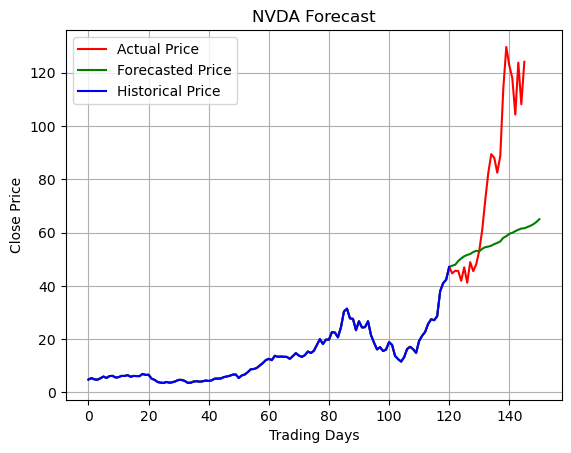

In [16]:
for i, forecast in enumerate(forecasts):
    true_pred = yf.download(
        symbols[i],
        start=forecast['Date'].iloc[0].strftime('%Y-%m-%d'),
        end=forecast['Date'].iloc[-1].strftime('%Y-%m-%d'),
    )
    true_pred = true_pred.iloc[::prediction_length // down_sample]

    plt.plot(true_pred['Close'].values, color="red", label="Actual Price")
    plt.plot(forecast['Close'].values, color="green", label="Forecasted Price")
    plt.plot(forecast['Close'].values[:-config.prediction_length], color="blue", label="Historical Price")
    plt.title(f'{symbols[i]} Forecast')
    plt.xlabel('Trading Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()